# Exploratory Data Analysis – Sensor Dataset

Este notebook realiza uma análise exploratória (EDA) básica do dataset de sensores.

Etapas abordadas:
1. Carregamento e união dos arquivos CSV.
2. Visualização inicial (shape, head).
3. Tipos de dados e estatísticas descritivas.
4. Valores ausentes.
5. Distribuição da variável *label*.
6. Correlações entre sensores.


In [1]:
# Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configurações de visualização
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [2]:
# Diretório dos datasets
data_dir = Path('..') / 'dataset'   

# Lista de arquivos CSV
csv_files = sorted(data_dir.glob('dataset_parte_*.csv'))
print(f'Encontrados {len(csv_files)} arquivos.')

# Carrega e concatena
df_list = [pd.read_csv(f) for f in csv_files]
df = pd.concat(df_list, ignore_index=True)
print('Shape total:', df.shape)

Encontrados 7 arquivos.


/tmp/ipykernel_4187/1458558783.py:9: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f) for f in csv_files]


Shape total: (603814, 36)


In [10]:
df.head()

,Timestamp,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,label
0,2023-09-24 00:00:00.863,-3.255208,-4.984538,-5.086263,-4.984538,-5.493164,-4.781087,-5.696614,-5.187988,-4.882812,...,-4.170735,-4.170735,-0.712077,-3.967285,-4.069010,-3.662109,-3.865560,-3.967285,-4.272461,sensor_1
1,2023-09-24 00:00:01.863,5.900065,9.155273,8.443196,9.053548,8.748372,8.036295,9.053548,8.850098,7.731120,...,5.187988,5.086263,1.118978,4.984538,5.086263,4.577637,4.679362,4.577637,4.882812,sensor_20
2,2023-09-24 00:00:02.863,7.222493,11.494954,10.375977,11.291504,10.782877,9.969075,11.189778,10.375977,9.358724,...,6.001790,6.103516,1.118978,5.798340,5.900065,5.289713,5.594889,5.289713,5.594889,sensor_28
3,2023-09-24 00:00:03.863,3.051758,5.289713,4.577637,5.187988,4.781087,4.577637,5.086263,4.577637,3.967285,...,1.831055,2.339681,0.000000,2.034505,1.831055,1.831055,1.525879,1.525879,1.831055,NaN
4,2023-09-24 00:00:04.863,0.406901,1.831055,1.118978,1.525879,1.525879,1.118978,1.729329,1.525879,1.831055,...,0.508626,0.101725,-0.305176,0.101725,0.101725,0.000000,-0.101725,-0.406901,0.000000,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603814 entries, 0 to 603813
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  603814 non-null  object 
 1   sensor_1   603814 non-null  float64
 2   sensor_2   603814 non-null  float64
 3   sensor_3   603814 non-null  float64
 4   sensor_4   603814 non-null  float64
 5   sensor_5   603814 non-null  float64
 6   sensor_6   603814 non-null  float64
 7   sensor_7   603814 non-null  float64
 8   sensor_8   603814 non-null  float64
 9   sensor_9   603814 non-null  float64
 10  sensor_10  603814 non-null  float64
 11  sensor_11  603814 non-null  float64
 12  sensor_12  603814 non-null  float64
 13  sensor_13  603814 non-null  float64
 14  sensor_14  603814 non-null  float64
 15  sensor_15  603814 non-null  float64
 16  sensor_16  603814 non-null  float64
 17  sensor_17  603814 non-null  float64
 18  sensor_18  603814 non-null  float64
 19  sensor_19  603814 non-n

In [12]:
df.describe().T.head(20)  # mostra primeiras 20 features para não poluir

,count,mean,std,min,25%,50%,75%,max
sensor_1,603814.0,-15.178241,222.204281,-565.69415,-94.807940,4.170735,43.233234,543.92490
sensor_2,603814.0,-23.622463,169.169927,-505.67627,-47.098793,-1.322428,26.041666,370.07648
sensor_3,603814.0,-22.739969,170.069995,-499.06412,-46.590168,-1.932780,23.905436,378.01105
sensor_4,603814.0,-22.650137,168.387532,-502.82794,-44.962563,-0.305176,26.346842,369.46613
sensor_5,603814.0,-27.306442,177.841807,-529.07306,-51.269530,-3.662109,23.803710,384.52148
sensor_6,603814.0,-22.767125,166.310555,-493.67267,-45.471190,-1.525879,25.533040,364.68506
sensor_7,603814.0,-34.042211,171.573352,-523.88510,-58.492023,-8.138020,21.260578,358.98843
sensor_8,603814.0,-26.858907,176.794648,-529.78516,-49.947100,-2.644857,25.939941,381.26627
sensor_9,603814.0,-21.680263,164.640953,-479.02423,-45.064290,-2.848307,22.583008,365.09195
sensor_10,603814.0,-24.632914,172.333429,-509.74527,-48.421223,-2.441406,25.227863,379.84210


In [13]:
# Verifica valores ausentes
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

label    603811
dtype: int64

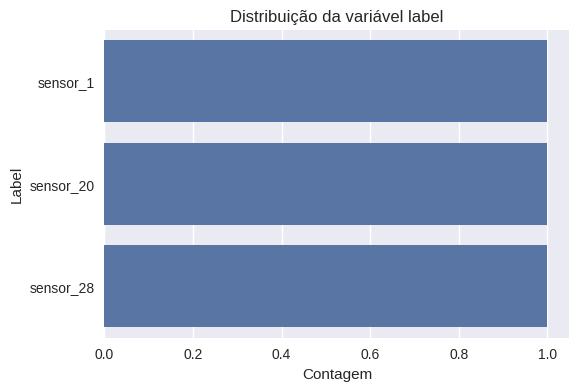

In [14]:
# Distribuição da variável label
plt.figure(figsize=(6,4))
sns.countplot(y=df['label'], order=df['label'].value_counts().index)
plt.title('Distribuição da variável label')
plt.xlabel('Contagem')
plt.ylabel('Label')
plt.show()

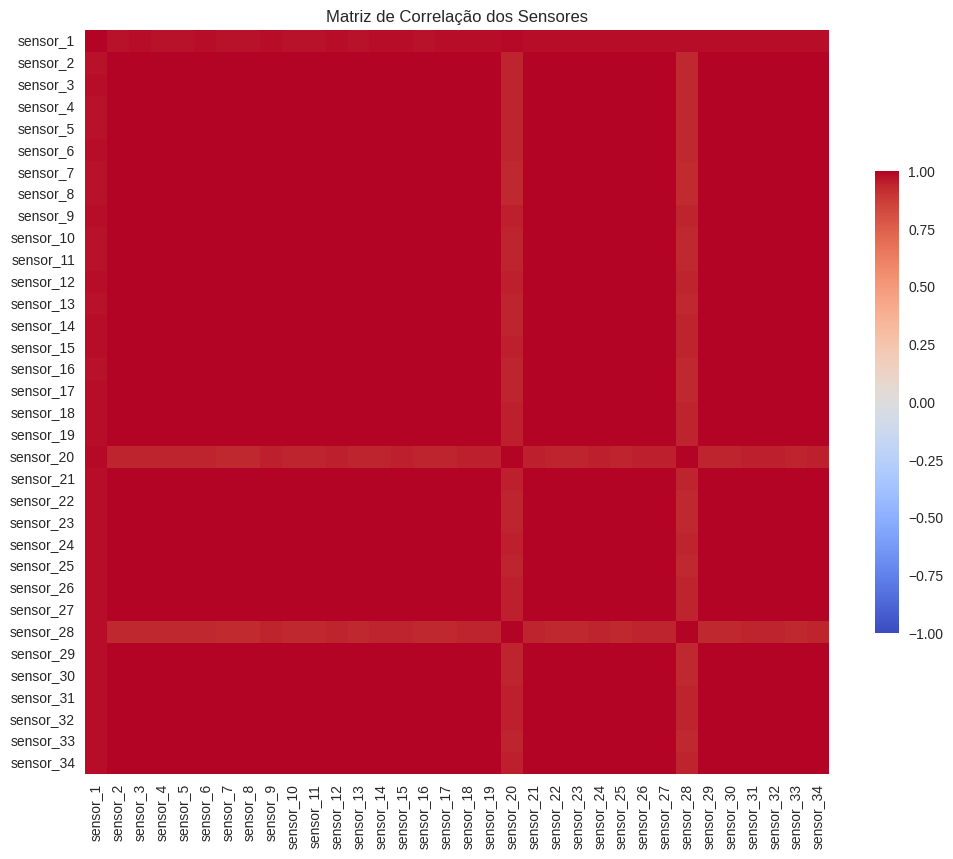

In [15]:
# Correlação
numeric_cols = [c for c in df.columns if c.startswith('sensor_')]
corr = df[numeric_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, vmax=1, vmin=-1, square=True, cbar_kws={'shrink': .6})
plt.title('Matriz de Correlação dos Sensores')
plt.show()